In [1]:
import pandas as pd 
import numpy as np 
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import metrics 
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('insurance .csv')
df.head() 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df['sex'].unique() 

array(['female', 'male'], dtype=object)

In [6]:
df['sex'].replace({'male':1,'female':0},inplace = True)

In [7]:
df['smoker'].unique() 

array(['yes', 'no'], dtype=object)

In [8]:
df['smoker'].replace({'yes':1,'no':0},inplace = True)

In [9]:
df.drop(['region'],axis=1,inplace=True)

In [10]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   charges   1338 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 62.8 KB


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

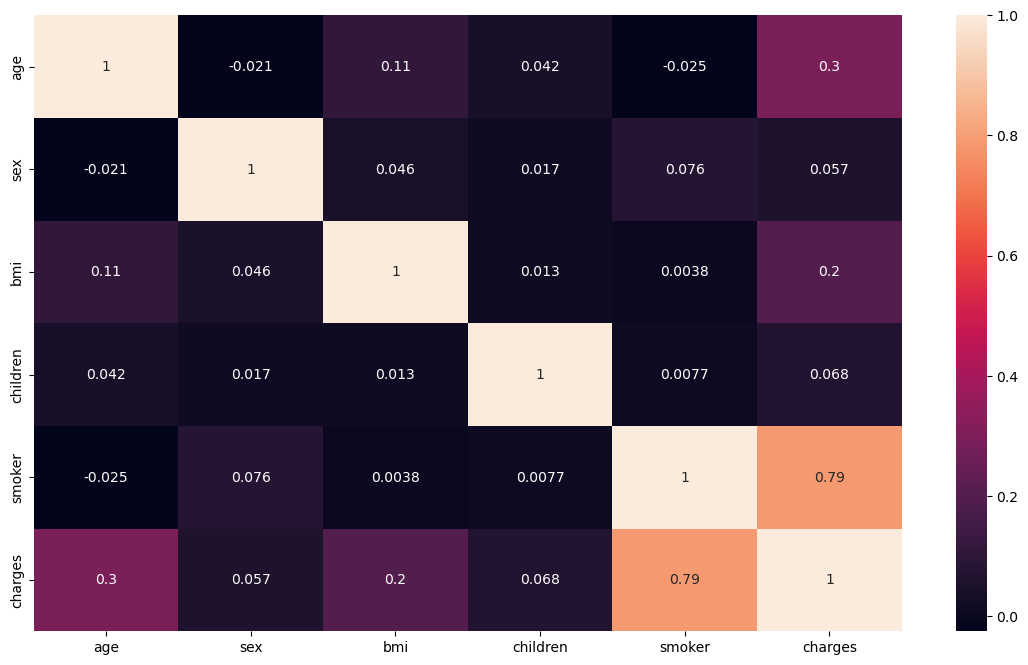

In [12]:
plt.figure(figsize = (14,8))
sns.heatmap(df.corr(), annot = True)

In [13]:
x=df.drop(['charges'],axis=1)
y=df['charges']

In [14]:
x.shape

(1338, 5)

In [15]:
y.shape

(1338,)

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 1)

x_train.shape

(1070, 5)

In [17]:
ada_regr=AdaBoostRegressor() 
ada_regr.fit(x_train,y_train) 

AdaBoostRegressor()

In [18]:
y_pred_test=ada_regr.predict(x_test)
y_pred_test 

array([ 7811.71940486, 14330.23702393, 14330.23702393, 16787.44230424,
        7811.71940486, 44290.37633811, 16787.44230424, 14330.23702393,
        7811.71940486, 20391.78090077, 15169.88612262, 17978.05711629,
       11365.30659876,  8052.28526852,  7294.7545361 , 16787.44230424,
        7811.71940486, 11365.30659876, 18570.48483495, 15169.88612262,
       14330.23702393, 44290.37633811, 14330.23702393, 14330.23702393,
        7294.7545361 ,  8052.28526852, 11365.30659876, 14330.23702393,
       11365.30659876,  7811.71940486, 18216.30024912, 11365.30659876,
       24936.63470941, 39504.44657667, 26112.45308836, 14330.23702393,
       44290.37633811, 20391.78090077, 14330.23702393, 44609.94099535,
       11365.30659876, 14330.23702393, 16787.44230424, 18570.48483495,
       11365.30659876, 15169.88612262,  7811.71940486, 44290.37633811,
       12084.82542326, 18216.30024912, 15169.88612262, 18216.30024912,
        7811.71940486, 16787.44230424, 20391.78090077,  7811.71940486,
      

In [19]:
y_pred_train=ada_regr.predict(x_train)
y_pred_train

array([14330.23702393, 17173.42312899,  7294.7545361 , ...,
       44609.94099535, 20238.16857327, 18216.30024912])

# Testing Dataset Accuracy

In [20]:
y_pred_test = ada_regr.predict(x_test)

mse = mean_squared_error(y_test,y_pred_test)
print('Mean Squared error:', mse)

rmse = np.sqrt(mse)
print(rmse)


r2_score(y_test,y_pred_test)*100

Mean Squared error: 31989031.21738961
5655.884653826456


78.57121238164007

# Training Data Accuracy

In [21]:
y_pred_train=ada_regr.predict(x_train)

mse=mean_squared_error(y_train,y_pred_train)
print(mse)

rmse=np.sqrt(mse)
print(rmse)

r2_score(y_train,y_pred_train)  *100

31085903.802127186
5575.473415067745


78.68623061715961